<a href="https://colab.research.google.com/github/visgn/Python_NT_Crime_Statistics_2008-2023/blob/main/Short_NT_Crime_Statistics_2008_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DATA ANALYSIS PROJECT**
## **Northern Territory Crime Statistics 2008-2023**
Vi Nguyen - Sep 2023
---

Using a dataset from the Crime, Justice, and Law section of the Darwin Data Portal, which provides crime statistics for the Northern Territory from January 2008 to June 2023, we aim to generate a report identifying crime trends, patterns, hotspots, and significant events throughout the years in the territory.

Within this report, we will perform an in-depth data exploration, execute data cleansing processes, and leverage advanced analytical methods and visualization techniques to derive actionable insights from the dataset.

First, import the libraries we are going to use in this project and upload the dataset.


In [171]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [173]:
nt_crime = pd.read_csv('/content/drive/MyDrive/DA/Project/nt_crime_statistics_jun_2023.csv')

## 1. Exploring data

Let's have a look some basic information of the dataset

In [174]:
nt_crime.head()

,As At,Year,Month number,Offence category,Offence type,Alcohol involvement,DV involvement,Reporting region,Statistical Area 2,Number of offences
0,1/08/2023,2008,1,Abduction - harassment and other offences agai...,Deprivation of liberty /false imprisonment,-,-,Alice Springs,-,1
1,1/08/2023,2008,1,Abduction - harassment and other offences agai...,Deprivation of liberty /false imprisonment,-,-,NT Balance,Alligator,1
2,1/08/2023,2008,1,Abduction - harassment and other offences agai...,Deprivation of liberty /false imprisonment,-,-,Tennant Creek,-,1
3,1/08/2023,2008,1,Abduction - harassment and other offences agai...,Harassment and private nuisance,-,-,NT Balance,Alligator,2
4,1/08/2023,2008,1,Abduction - harassment and other offences agai...,Harassment and private nuisance,-,-,NT Balance,Daly,1


The first column 'As At' is just the last updated date of the dataset. We don't need this information in the table.

The columns'name have spaces, we should change to this_format_name to get easier when analyzing later

In [175]:
#Drop the first column 'As At' and change columns' name
nt_crime.drop('As At', axis = 1, inplace = True)

In [176]:
nt_crime.columns = ['Year', 'Month', 'Offence_Category', 'Offence_Type', 'Alcohol_Involvement', 'DV_Involvement', 'Reporting_Region', 'Statistical_Area_2', 'Number_of_Offences']
display(nt_crime.columns)
len(nt_crime.columns)

Index(['Year', 'Month', 'Offence_Category', 'Offence_Type',
       'Alcohol_Involvement', 'DV_Involvement', 'Reporting_Region',
       'Statistical_Area_2', 'Number_of_Offences'],
      dtype='object')

9



The dataset has 9 columns with formated columns' name.

Next step, get more overall information from the dataset


In [177]:
nt_crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48787 entries, 0 to 48786
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Year                 48787 non-null  int64 
 1   Month                48787 non-null  int64 
 2   Offence_Category     48787 non-null  object
 3   Offence_Type         48787 non-null  object
 4   Alcohol_Involvement  48787 non-null  object
 5   DV_Involvement       48787 non-null  object
 6   Reporting_Region     48787 non-null  object
 7   Statistical_Area_2   48787 non-null  object
 8   Number_of_Offences   48787 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 3.4+ MB



The dataset has 9 columns and 48787 records, all filled by values. There's 3 integer type such as Year, Month and Number_Of_Offences. Other columns are object (string type), including Offence_Category, Offence_Type, Alcohol_Involvement, DV_Involvement, Reporting_Region, Statistical_Area_2

There's some '-' values in column Alcohol_Involvement, DV_Involvement and Statistical_Area_2 as head table above. We can see it's still a valid values when it comes to these specific columns.

In [178]:
nt_crime.describe()

,Year,Month,Number_of_Offences
count,48787.000000,48787.000000,48787.000000
mean,2015.459323,6.414127,9.513784
std,4.489725,3.482547,27.403472
min,2008.000000,1.000000,1.000000
25%,2012.000000,3.000000,1.000000
50%,2016.000000,6.000000,3.000000
75%,2019.000000,9.000000,7.000000
max,2023.000000,12.000000,463.000000


In [179]:
nt_crime.describe(include='object')

,Offence_Category,Offence_Type,Alcohol_Involvement,DV_Involvement,Reporting_Region,Statistical_Area_2
count,48787,48787,48787,48787,48787,48787
unique,11,23,4,3,7,21
top,Acts intended to cause injury,Assault,-,-,NT Balance,-
freq,17802,17479,31308,31308,30818,17969


Here's some basic statistical info about this dataset.
- 16 years of data
- Month's values are correct
- 11 categories of offence which have 23 offence types
- 4 types of involvement by alcohol and 3 for DV. Most of crime doesn't have DV involvement or Alcohol involvement
- The dataset was reporting on 7 regions in NT which have 21 Statistical_Area_2


Next step, check on the dublicated values and some value distributions

In [180]:
nt_crime.isnull().sum()

Year                   0
Month                  0
Offence_Category       0
Offence_Type           0
Alcohol_Involvement    0
DV_Involvement         0
Reporting_Region       0
Statistical_Area_2     0
Number_of_Offences     0
dtype: int64

In [181]:
nt_crime.duplicated().sum()

0

To decide which values we should use to analyze the dataset, we need to deep dive to get detail of values in each column below:
- Offence_Category
- Offence_Type
- Alcohol_Involment
- DV_Involvement
- Reporting_Region
- Statistical_Area_2

In [182]:
#What values we have in Offence_Category, Offence_Type?
nt_crime.groupby(['Offence_Category', 'Offence_Type']).count()

Year  \
Offence_Category                                   Offence_Type                                                
Abduction - harassment and other offences again... Abduction and kidnapping                               17   
                                                   Deprivation of liberty /false imprisonment            525   
                                                   Harassment and private nuisance                       753   
                                                   Threatening behaviour                                1611   
Acts intended to cause injury                      Assault                                             17479   
                                                   Other acts intended to cause injury                   323   
Commercial break-ins                               Commercial break-ins actual                          3779   
                                                   Commercial break-ins attempted                       1663   
Homicide and related Offences                      Attempted Murder                                       44   
                                                   Driving causing death                                  38   
                                                   Manslaughter                                           44   
                                                   Murder                                                125   
House break-ins                                    House break-ins actual                               3153   
                                                   House break-ins attempted                            1297   
Motor theft and related offences                   Illegal use of a motor vehicle                       2562   
                                                   Theft of motor vehicle parts or contents             2024   
Other Dangerous or negligent acts endangering p... Other dangerous or negligent acts endangering p...   1103   
Property Damage Offences                           Property damage offences                             4536   
Robbery - extortion and related offences           Blackmail and extortion                                32   
                                                   Robbery                                               679   
Sexual Assault and related offences                Non-assaultive sexual offences                        549   
                                                   Sexual assault                                       1983   
Theft and related offences (other than MV)         Theft and related offences (other than MV)           4468   

                                                                                                       Month  \
Offence_Category                                   Offence_Type                                                
Abduction - harassment and other offences again... Abduction and kidnapping                               17   
                                                   Deprivation of liberty /false imprisonment            525   
                                                   Harassment and private nuisance                       753   
                                                   Threatening behaviour                                1611   
Acts intended to cause injury                      Assault                                             17479   
                                                   Other acts intended to cause injury                   323   
Commercial break-ins                               Commercial break-ins actual                          3779   
                                                   Commercial break-ins attempted                       1663   
Homicide and related Offences                      Attempted Murder                                       44   
                                                   Driving causing deat


The "Offence_Type" column doesn't appear to adequately represent the nature of the crime. Some entries seem ambiguous or lack context without their corresponding offence category.

We should use the Offence_Category to represent for crime and find out the types when we need it in the next phase.

There are 11 offence categories.


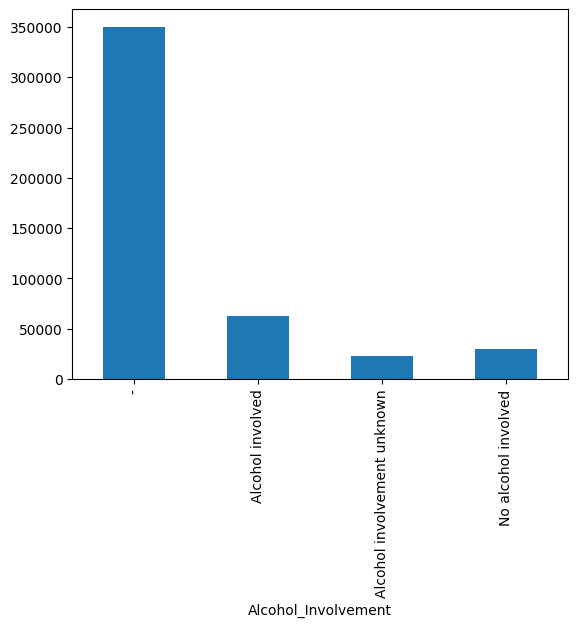

In [183]:
#Checking on values in Alcohol_Involvement column
nt_crime.groupby('Alcohol_Involvement').sum(['Number_of_Offences'])['Number_of_Offences'].plot.bar()
plt.show()

The values in column Alcohol_Involvement looks a bit confusing. The '-' values quite a lot. Also, the 'unknown' takes a big part along 4 values. We should not use this data to analyze the insights for the whole dataset. However, let's find out more deeply which category impacted by Alcohol, make sure we don't miss out any valuable information.

In [184]:
#Finding which category has alcohol unknown

crime_alcohol_unknown = nt_crime[nt_crime['Alcohol_Involvement'] == 'Alcohol involvement unknown']
crime_alcohol_unknown.groupby('Offence_Category')['Number_of_Offences'].sum()

Offence_Category
Acts intended to cause injury    22552
Name: Number_of_Offences, dtype: int64

In [185]:
#Finding which category doesn't have alcohol involved

crime_not_alcohol = nt_crime[nt_crime['Alcohol_Involvement'] == 'No alcohol involved']
crime_not_alcohol.groupby('Offence_Category')['Number_of_Offences'].sum()

Offence_Category
Acts intended to cause injury    29424
Name: Number_of_Offences, dtype: int64

In [186]:
##Finding which category has alcohol involved

crime_alcohol = nt_crime[nt_crime['Alcohol_Involvement'] == 'Alcohol involved']
crime_alcohol.groupby('Offence_Category')['Number_of_Offences'].sum()

Offence_Category
Acts intended to cause injury    62141
Name: Number_of_Offences, dtype: int64

In [187]:
##Finding which category has alcohol involvement that is '-'
crime_alcohol_invalid = nt_crime[nt_crime['Alcohol_Involvement'] == '-']
crime_alcohol_invalid.groupby('Offence_Category')['Number_of_Offences'].sum()

Offence_Category
Abduction - harassment and other offences against the person      5543
Acts intended to cause injury                                      406
Commercial break-ins                                             32999
Homicide and related Offences                                      263
House break-ins                                                  33037
Motor theft and related offences                                 31623
Other Dangerous or negligent acts endangering persons             1966
Property Damage Offences                                        120091
Robbery - extortion and related offences                          2185
Sexual Assault and related offences                               6895
Theft and related offences (other than MV)                      115024
Name: Number_of_Offences, dtype: int64

There is only one category Acts intended to cause injury has alcohol involvement with valid values. All other categories has no valid values. So we are not able to use Alcohol_Involvement except when digging in only category Acts intended to cause injury.

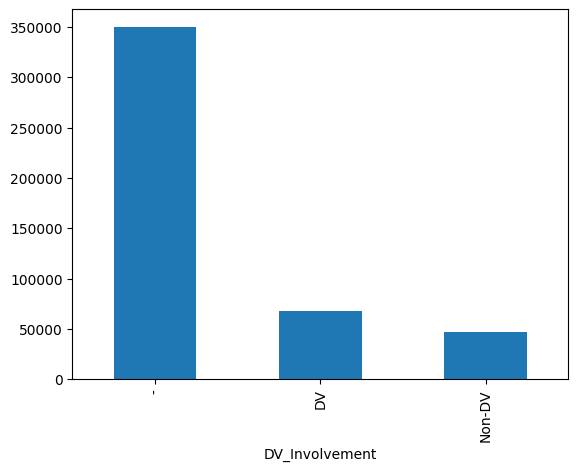

In [188]:
#Checking on values in DV_Involvement column

nt_crime.groupby('DV_Involvement')['Number_of_Offences'].sum().plot.bar()
plt.show()

In [189]:
##Finding which category has DV involved'

crime_DV = nt_crime[nt_crime['DV_Involvement'] == 'DV']
crime_DV.groupby('Offence_Category')['Number_of_Offences'].sum()

Offence_Category
Acts intended to cause injury    67290
Name: Number_of_Offences, dtype: int64

In [190]:
##Finding which category doesn't have DV involved

crime_nonDV = nt_crime[nt_crime['DV_Involvement'] == 'Non-DV']
crime_nonDV.groupby('Offence_Category')['Number_of_Offences'].sum()

Offence_Category
Acts intended to cause injury    46827
Name: Number_of_Offences, dtype: int64

In [191]:
##Finding which category has DV involvement '-'

crime_DV_invalid = nt_crime[nt_crime['DV_Involvement'] == '-']
crime_DV_invalid.groupby('Offence_Category')['Number_of_Offences'].sum()

Offence_Category
Abduction - harassment and other offences against the person      5543
Acts intended to cause injury                                      406
Commercial break-ins                                             32999
Homicide and related Offences                                      263
House break-ins                                                  33037
Motor theft and related offences                                 31623
Other Dangerous or negligent acts endangering persons             1966
Property Damage Offences                                        120091
Robbery - extortion and related offences                          2185
Sexual Assault and related offences                               6895
Theft and related offences (other than MV)                      115024
Name: Number_of_Offences, dtype: int64

Same as Alcohol_Involvement, the DV_Involvement has so many invalid values '-', and the valid values only stays at one category Acts intended to cause injury. We not using DV_Involvement in analyzing the dataset except when dig in only category Acts intended to cause injury.

In [192]:
#Explore Reporting_Region and Statistical_Area_2

nt_crime.groupby(['Reporting_Region', 'Statistical_Area_2'])['Number_of_Offences'].sum()

Reporting_Region  Statistical_Area_2  
Alice Springs     -                       106477
Darwin            -                       157788
Katherine         -                        28129
NT Balance        Alligator                 6036
                  Anindilyakwa              6156
                  Barkly                    3336
                  Daly                      2779
                  East Arnhem               9590
                  Elsey                     3702
                  Gulf                      8491
                  Howard Springs            3203
                  Humpty Doo                3871
                  Petermann - Simpson       4415
                  Sandover - Plenty         2885
                  Tanami                    5591
                  Thamarrurr                7678
                  Tiwi Islands              4763
                  Unknown                    341
                  Victoria River            4913
                  Virginia    

It's pretty clear that only NT Balance has Statistical_Area_2. We're not using the column Statistical_Area_2 to analyze the whole dataset, only using when we focus on only NT Balance.

In short, we are going to use Year, Month, Offence_Category, Reporting_Region and Number_Of_Offence to analyze the dataset. Beside, we recognize that Category Acts intended to cause injury and Region NT Balance have more detail information than the other.

Looks good, cleaned data. Now we can start some basic metrics to understand the dataset in the deeper levels.

# 2. Analyzing Data

In this part, we are going to answer some questions related to the dataset.

*   The trends of crime over years, which year has the most crimes?
*   Show the crimes by month in each year
*   What offence category has most crimes?
*   What is the most dangerous region?
*   Offence categories by region and time
*   Top offence categories in top dangerous regions
*   The impact of alcohol and domestic violent in crimes

Besides, we are open to dig in other questions along the way if there's interesting information.

In [193]:
crime = nt_crime[nt_crime['Year'] != 2023]

Because the year 2023 only has 6 months records updated, we only use the dataset from 2008 - 2022 for overall analysis

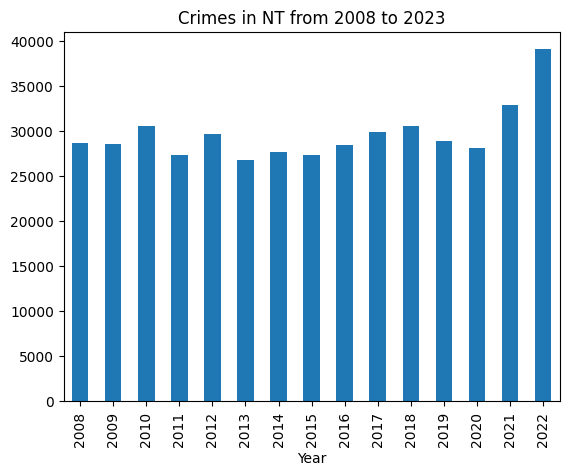

In [194]:
#Trend of crimes over years
crime_by_year = crime.groupby('Year')['Number_of_Offences'].sum()
crime_by_year.plot.bar()
plt.title('Crimes in NT from 2008 to 2023')
plt.show()

The crime trend in the NT was stable from 2008 to 2020.

We can see the trend has suddenly increased from 2021 to 2022, it was time of Covid 19

The highest number of crime is in 2022.

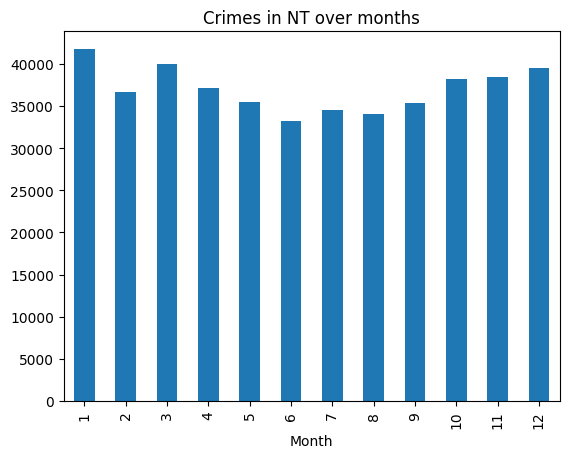

In [195]:
#Trend of crimes over months
crime_by_month = crime.groupby('Month')['Number_of_Offences'].sum()
crime_by_month.plot.bar()
plt.title('Crimes in NT over months')
plt.show()

January and March have the highest numbers of crime.

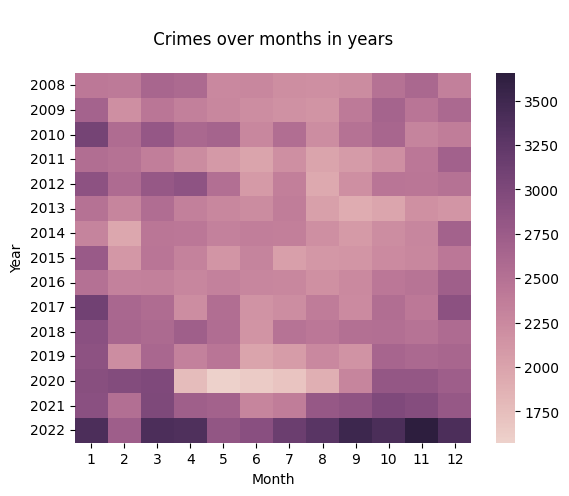

In [196]:
#Which month in year all the crimes happened
crime_month_year = crime.groupby(['Year','Month'])['Number_of_Offences'].sum().unstack()
sns.heatmap(crime_month_year, cmap=sns.cubehelix_palette(as_cmap=True))
plt.title('\n Crimes over months in years \n')
plt.show()


- 2020 from April to August: less crimes due to Covid19 lockdown in the NT
- 1/2023 was the highest crimes in NT over 16 years

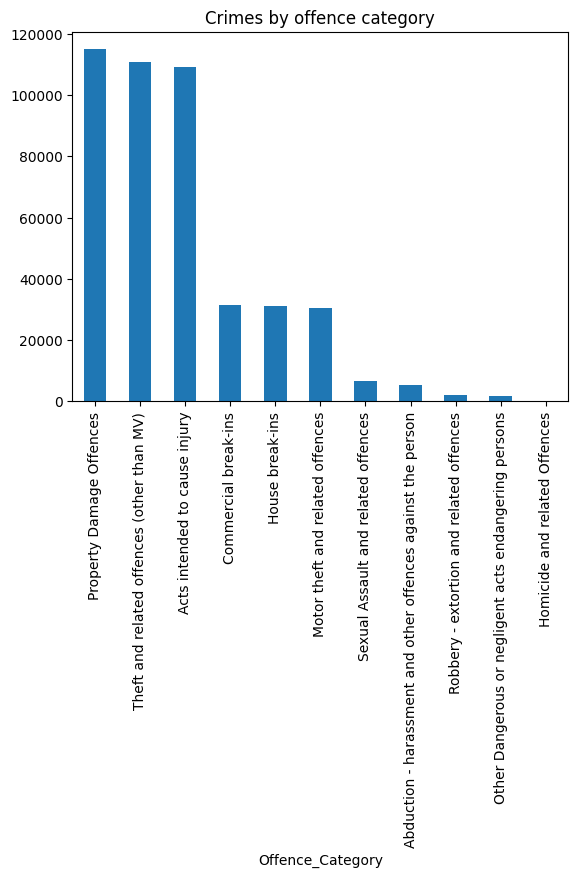

In [197]:
#What offence category has most crimes?
crime_by_category = crime.groupby('Offence_Category')['Number_of_Offences'].sum().sort_values(ascending = False)
crime_by_category.plot.bar()
plt.title('Crimes by offence category')
plt.show()

We can see the top 3 types of offence are Property damage offences, Theft and related offences, Acts intended to cause injury.
The next 3 types are House break-ins, Commercial break-ins, Motor theft and related offences

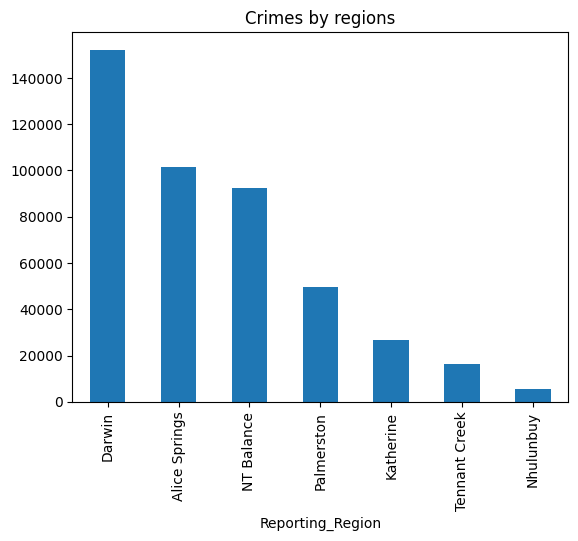

In [198]:
#Which region have the most crime?
crime_by_region = crime.groupby('Reporting_Region')['Number_of_Offences'].sum().sort_values(ascending = False)
crime_by_region.plot.bar()
plt.title('Crimes by regions')
plt.show()

Obviously, Darwin and Alice Springs the two biggest cities in the NT have the most crime in the whole territory.

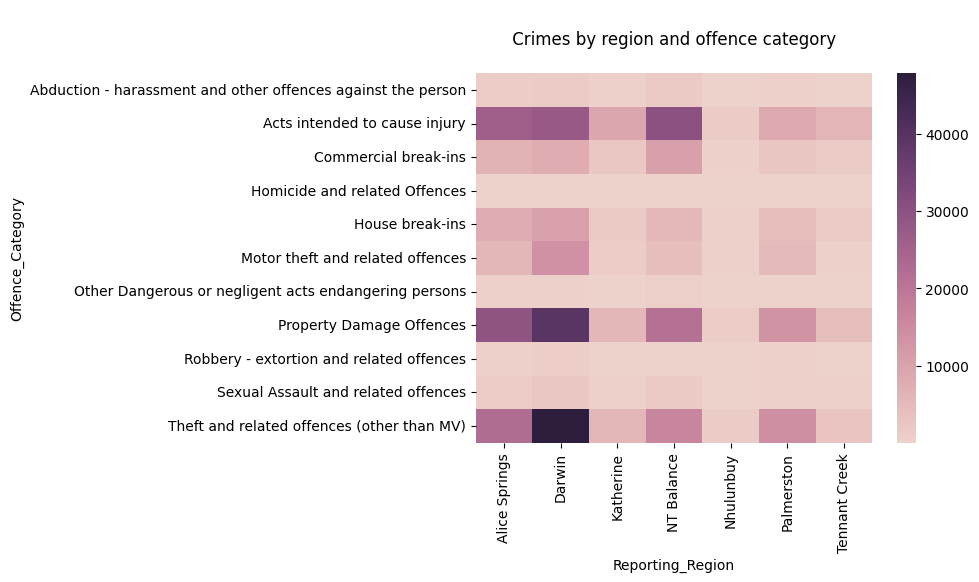

In [199]:
#Where all the crimes happened
crime_region_category = crime.groupby(['Offence_Category','Reporting_Region'])['Number_of_Offences'].sum().unstack()
sns.heatmap(crime_region_category, cmap=sns.cubehelix_palette(as_cmap=True))
plt.title('\n Crimes by region and offence category \n')
plt.show()

- Alice Springs, Darwin and NT Balance have the most crimes in NT
- Acts intended to cause injury, Property Damage Offences and Theft and related offences (other than MV) are the most categories of crime in NT
- Motor theft and related offences seems like only happen in Darwin
- Nhulunbuy is the most safety region
- Robery - extortion and related offences and Homicide and related offences are the categories have least cases happened

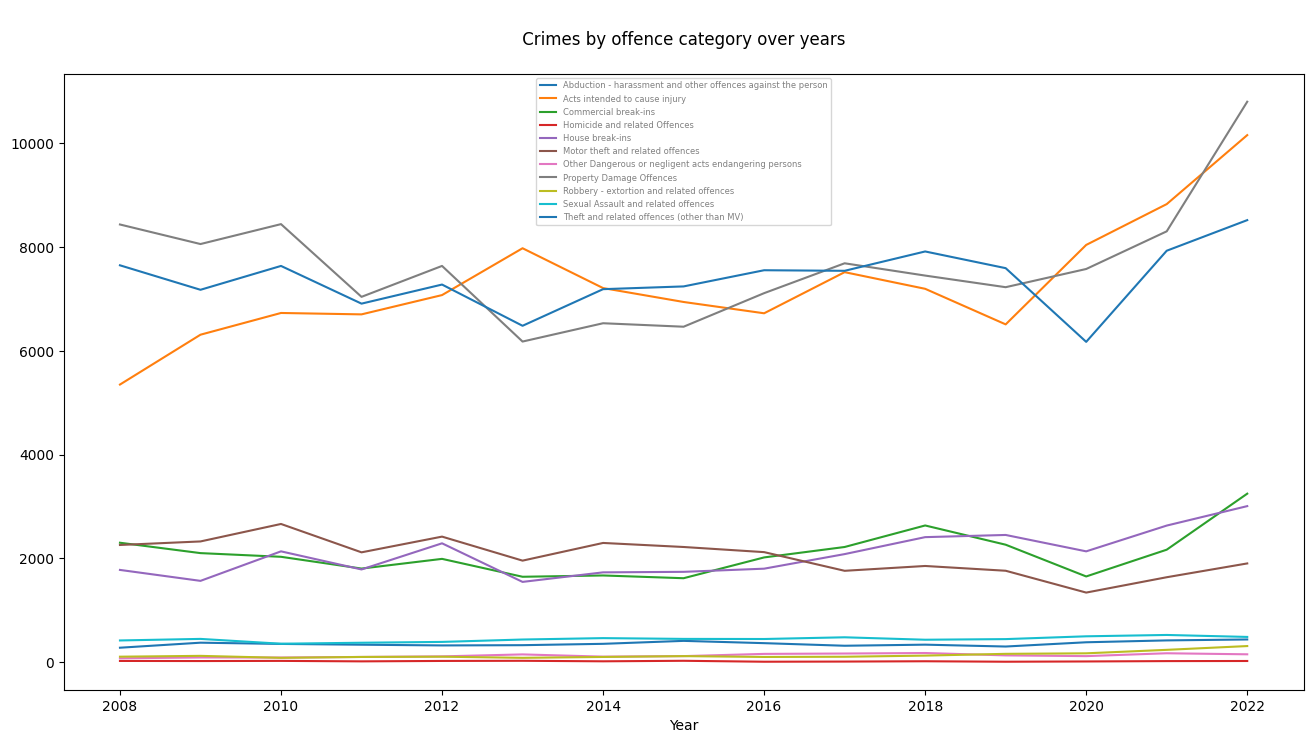

In [200]:
#When all crimes happened
crime_category_year = crime.groupby(['Year','Offence_Category'])['Number_of_Offences'].sum().unstack()
crime_category_year.plot.line(figsize=(16, 8))
plt.legend(labelcolor='grey', loc='best', prop={'size': 6})
plt.title('\n Crimes by offence category over years \n')
plt.show()

- Acts intended to cause injury, Property Damage offences have been increasing sinificantly lately from 2015 to 2022. Especially in 2022, we can see the high number of crime happened that made the heatmap become clearly dark.
- We are going to focus on top 3 of offence categories and 3 regions have the most crimes

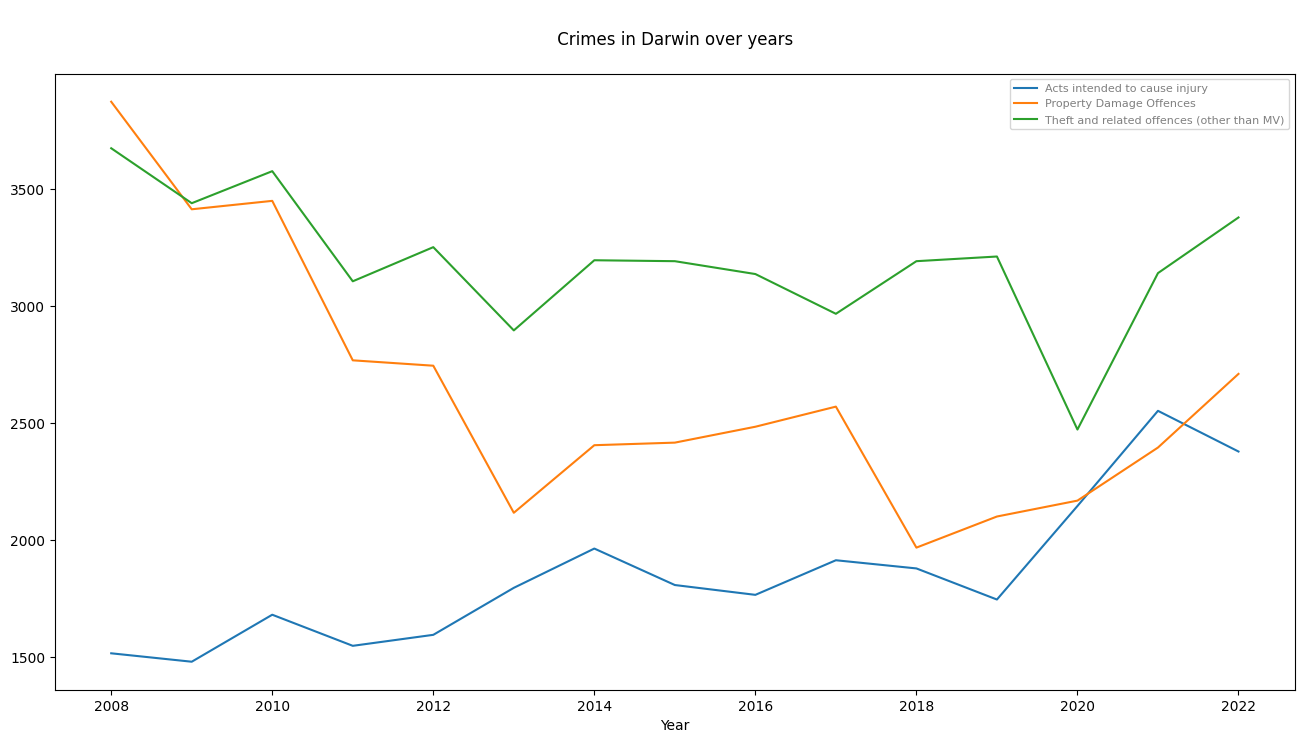

In [201]:
#Creat a table has only information in top 3 offence categories
top3_category = crime_by_category[:3].index.tolist()
crime_by_category_top3 = crime[crime['Offence_Category'].isin(top3_category)]

#Top 3 offence categories happened in Darwin over years
crime_Darwin_top3 = crime_by_category_top3[crime_by_category_top3['Reporting_Region'] == 'Darwin']
Darwin_linechart = crime_Darwin_top3.groupby(['Year','Offence_Category'])['Number_of_Offences'].sum().unstack()

Darwin_linechart.plot.line(figsize=(16, 8))
plt.legend(labelcolor='grey', loc='best', prop={'size': 8})
plt.title('\n Crimes in Darwin over years \n')
plt.show()

- Surprisingly, the number of crimes in Darwin even is the highest in the NT, it's slowly decreasing over years, espesically on Proferty Damage Offences. On the other hand, Acts intended to cause injury tends to happen more lately. Theft and related offences (other than MV) keeps staying stable at high number of cases.
- Shifting from Property Damage Offences to Acts intended to cause injury

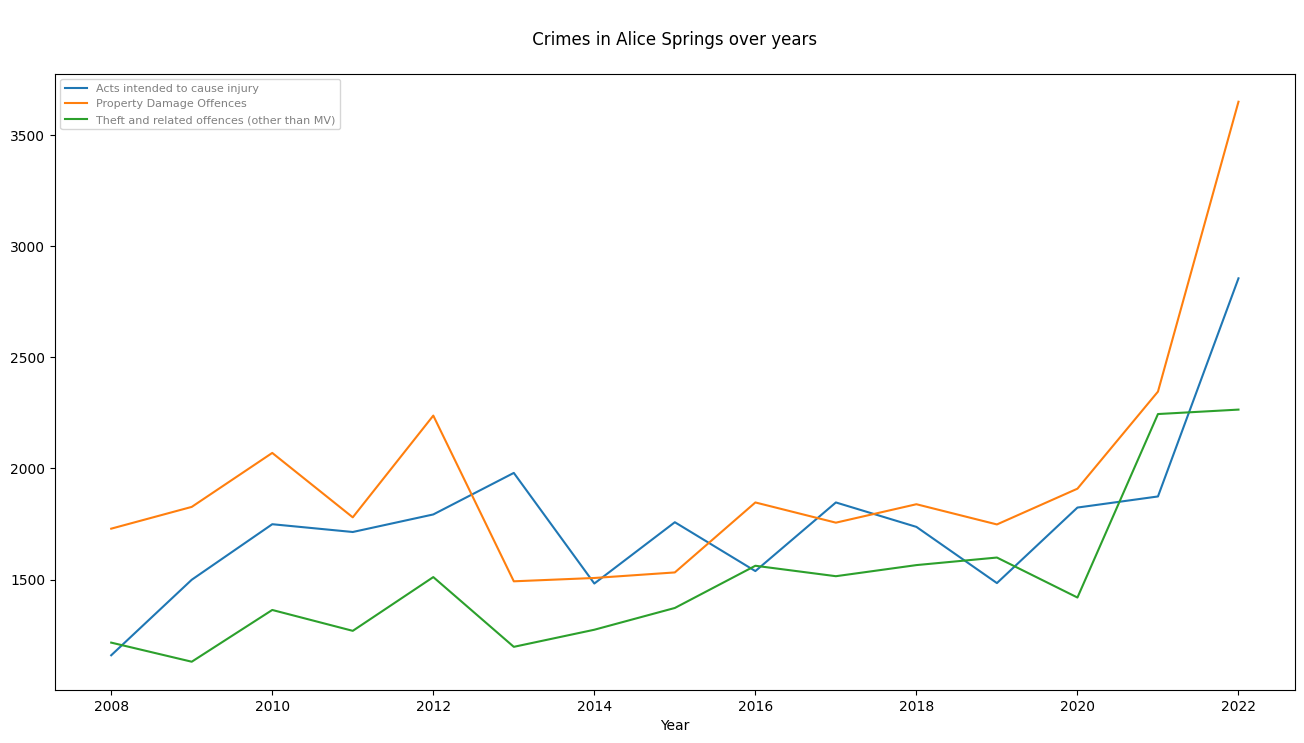

In [202]:
#Top 3 offence categories happened in Alice Spring over years
crime_Alice_top3 = crime_by_category_top3[crime_by_category_top3['Reporting_Region'] == 'Alice Springs']
Alice_linechart = crime_Alice_top3.groupby(['Year', 'Offence_Category'])['Number_of_Offences'].sum().unstack()
Alice_linechart.plot.line(figsize=(16, 8))
plt.legend(labelcolor='grey', loc='best', prop={'size': 8})
plt.title('\n Crimes in Alice Springs over years \n')
plt.show()

Opposite to Darwin, crimes in Alice Springs happened most in the last year 2022 and has a increasing trends over years specific in Property Damage Offences and Acts intended to cause injury.

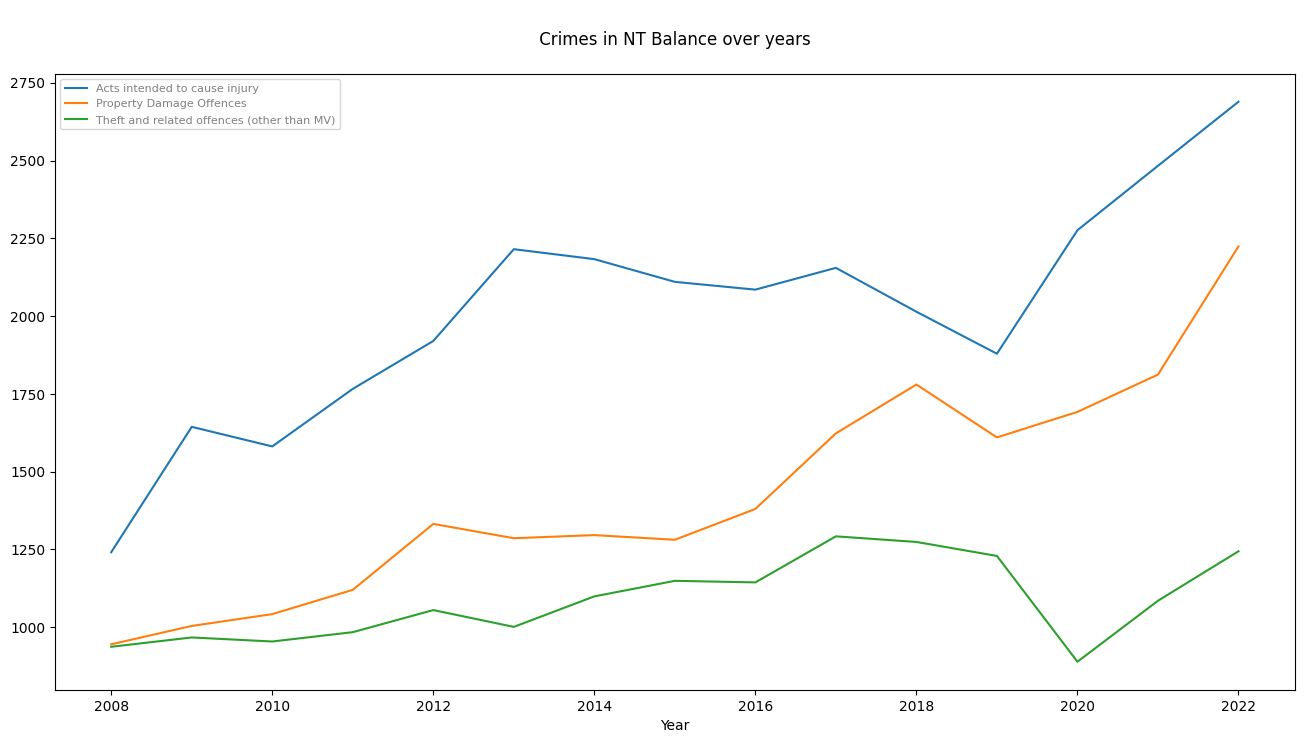

In [203]:
#Top 3 offence categories happened in NT Balance over years
crime_Balance_top3 = crime_by_category_top3[crime_by_category_top3['Reporting_Region'] == 'NT Balance']
Balance_linechart = crime_Balance_top3.groupby(['Year','Offence_Category'])['Number_of_Offences'].sum().unstack()
Balance_linechart.plot.line(figsize=(16, 8))
plt.legend(labelcolor='grey', loc='best', prop={'size': 8})
plt.title('\n Crimes in NT Balance over years \n')
plt.show()

Different to Darwin, NT Balance has highest crime in Acts intended to cause injury and least crime in Theft and related offences (other than MV). Besides, this offence category and Property Damage Offences are roughly increasing over years and specially reaching the peak last year 2022.

<ipython-input-204-f8095f067ad9>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  focus_crime = crime_by_category_top3[crime['Reporting_Region'].isin(top3_region)]


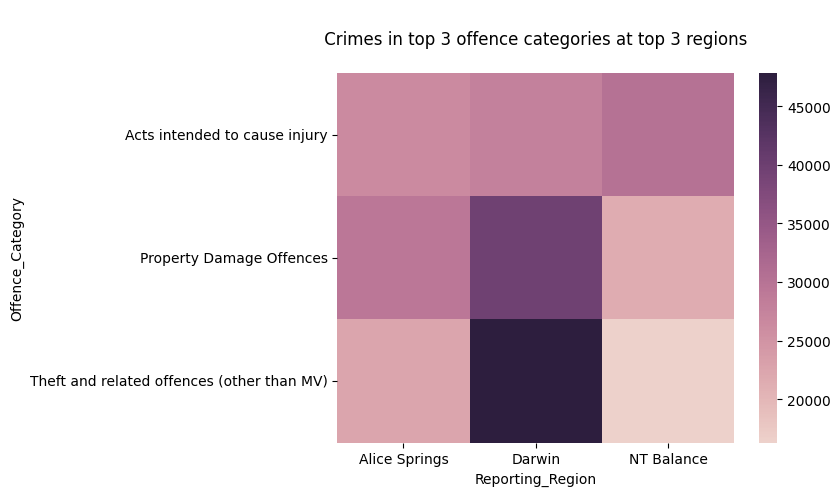

In [204]:
#Creat a table of crimes in 3 offence categories at top 3 dangerous regions
top3_region = crime_by_region[:3].index.tolist()
focus_crime = crime_by_category_top3[crime['Reporting_Region'].isin(top3_region)]
#The distribution of 3 offence categories in top 3 dangerous regions
focus_headmap = focus_crime.groupby(['Offence_Category', 'Reporting_Region'])['Number_of_Offences'].sum().unstack()
sns.heatmap(focus_headmap, cmap=sns.cubehelix_palette(as_cmap=True))
plt.title('\n Crimes in top 3 offence categories at top 3 regions \n')
plt.show()

Darwin is standout by the number of crimes in Theft and related offences and following by Property Damage Offences. When NT Balance has high crimes in Acts intended to cause injury and Alice Spring has steady number of crimes.

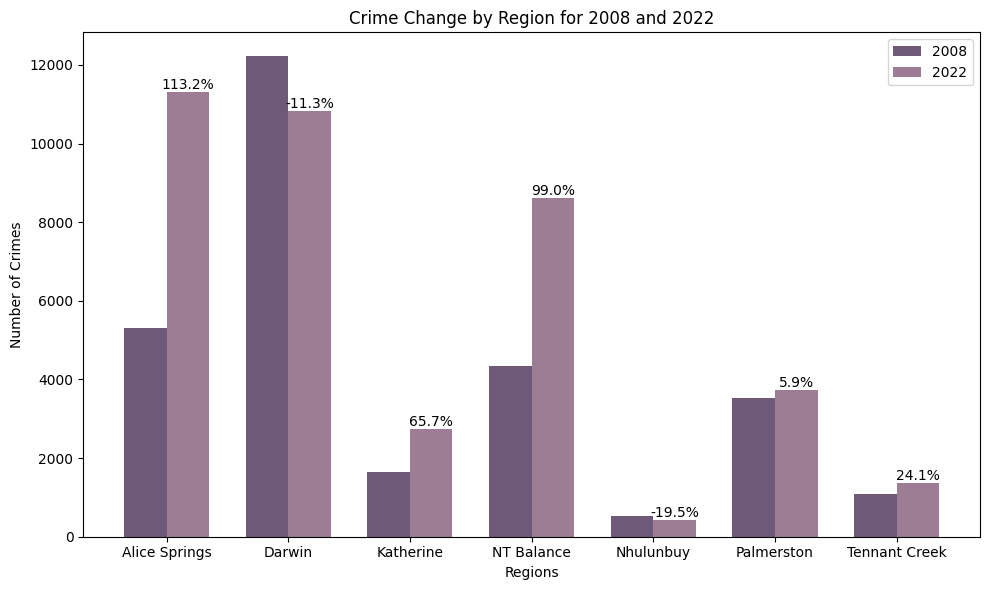

In [205]:
#Tables for year 2008 and 2022
crime_2008 = crime[crime['Year'] == 2008]
crime_2022 = crime[crime['Year'] == 2022]

# Calculate change rates each region between year 2008 and year 2022, and get the region name as a list
number_crime_2022 = crime_2022.groupby('Reporting_Region')['Number_of_Offences'].sum()
number_crime_2008 = crime_2008.groupby('Reporting_Region')['Number_of_Offences'].sum()
percentage_change = ((number_crime_2022 - number_crime_2008) / number_crime_2008) * 100
regions = percentage_change.index.tolist()

# Plotting
bar_width = 0.35
index = np.arange(len(regions))

fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(index, number_crime_2008, bar_width, label='2008', alpha=0.8, color = '#4b2f57')
bar2 = ax.bar(index + bar_width, number_crime_2022, bar_width, label='2022', alpha=0.8, color = '#855c78')

# Annotate with percentage change
for i, (bar, change) in enumerate(zip(bar2, percentage_change)):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{change:.1f}%', ha='center', va='bottom', color='black')

ax.set_xlabel('Regions')
ax.set_ylabel('Number of Crimes')
ax.set_title('Crime Change by Region for 2008 and 2022')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(regions)
ax.legend()

plt.tight_layout()
plt.show()

The crime rate in Darwin and Nhulunbuy has decreased from 2008 to 2022. Conversely, Alice Springs and NT Balance have seen a significant increase in their crime rates over the years, approximately doubling.

Darwin and Nhulunbuy have decreased number of crimes in their regions.
Alice Spring has got very high crime rate over years, following by NT Balance

From 2008 to 2023, there's a noticeable shift in crime occurrences from Darwin to other regions.


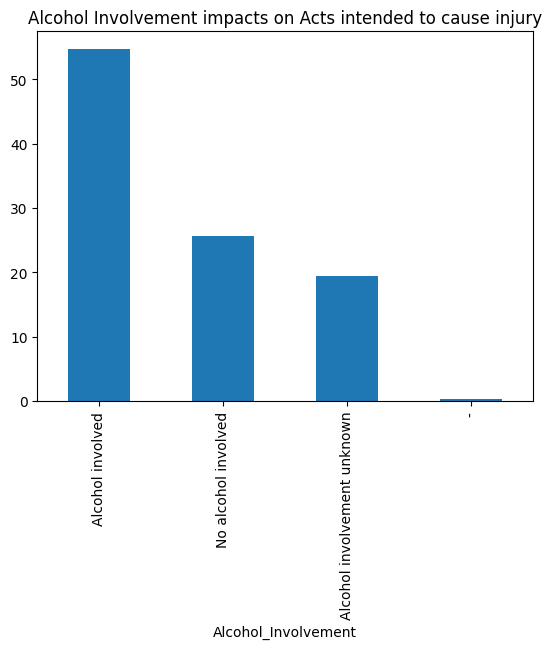

In [206]:
#the impact of alcohol and DV in Acts intended to cause injury category
crime_injury = crime[crime['Offence_Category'] == 'Acts intended to cause injury']
crime_injury_by_alcohol = crime_injury.groupby('Alcohol_Involvement')['Number_of_Offences'].sum()
total_crime_injury = crime_injury.sum()['Number_of_Offences']
percentage = ((crime_injury_by_alcohol / total_crime_injury)*100).sort_values(ascending = False)
percentage.plot.bar()
plt.title('Alcohol Involvement impacts on Acts intended to cause injury')
plt.show()

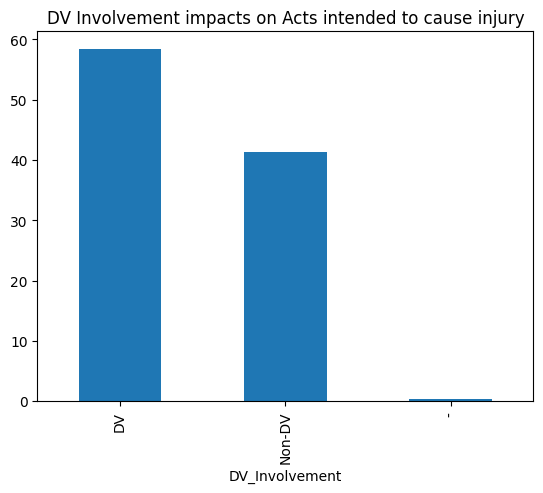

In [207]:
#the impact of DV in Acts intended to cause injury category
crime_injury = crime[crime['Offence_Category'] == 'Acts intended to cause injury']
crime_injury_by_DV = crime_injury.groupby('DV_Involvement')['Number_of_Offences'].sum()
total_crime_injury = crime_injury.sum()['Number_of_Offences']
percentage = ((crime_injury_by_DV / total_crime_injury)*100).sort_values(ascending = False)
percentage.plot.bar()
plt.title('DV Involvement impacts on Acts intended to cause injury')
plt.show()

We can see the Alcohol Involved got more than 50% of Acts intended to cause injury.

On the other hand, Domestic Violent got almost 60% of cases in Acts intended to cause injury.

In [209]:
nt_crime[nt_crime['Number_of_Offences'] == nt_crime['Number_of_Offences'].max()]

,Year,Month,Offence_Category,Offence_Type,Alcohol_Involvement,DV_Involvement,Reporting_Region,Statistical_Area_2,Number_of_Offences
47251,2023,1,Property Damage Offences,Property damage offences,-,-,Alice Springs,-,463


Alice Springs got the highest number of crimes in a month of all times in Property Damage Offences with 463 cases in Jan/2023

# 3. Conclusion:

1.   An upward trend in crime rates was observed from 2008 to 2023, with 2022 marking the peak year in recorded crimes.
2.   Dominant offense categories include Property Damage Offences, Theft and related offences (excluding motor vehicles), and Acts intended to cause injury, highlighting key areas of concern.
3.   From a regional perspective:
*   Darwin: 'Theft and related offences' took the lead in frequency. However, it's worth noting that Property Damage Offences have seen a considerable decline over the years. Contrarily, Acts intended to cause injury are relatively fewer.
*   Alice Springs: Crime rates across the key offence categories have surged, with 2022 being particularly notable.
*   NT Balance: An alarming rise in the 'Acts intended to cause injury' category was detected. Interestingly, this region has fewer 'Theft and related offences' compared to Darwin.
4.   There's a subtle yet discernible migration of crime from Darwin towards other regions, suggesting changing patterns in criminal activities.
5.   Alcohol and domestic violence are evident catalysts for the 'Acts intended to cause injury' category, positioning it as the third most frequent crime type in NT. The impact is especially profound in the NT Balance region and saw an escalation in 2022.
6.   Seasonality plays a role in crime rates. The wet season, especially January and March, seems to coincide with spikes in crime occurrences.
7.   A standout data point: In January 2023, Alice Springs recorded 463 cases under the Property Damage Offences category — a historic high across all categories and regions in NT.

This analysis offers a snapshot of the evolving crime landscape in the Northern Territory. While it showcases distinct patterns, it also underscores the need for continuous monitoring and interventions to maintain public safety.